 # Python Real Life Restaurant Analysis - for a restaurant in Kerala

 
 

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [4]:
df=pd.read_csv("D:/project/homies_cafe_.csv")

# Sample Dataset

In [5]:
df.head(4)

,ORDER Id,ORDER DATE,TIME,ITEM,CATEGORT,UNIT PRICE,QNTY,AMT
0,1,01-05-2025,11:00:00,BUTTER ROTI,BREADS,35.0,2,70
1,2,01-05-2025,13:00:00,CHICKEN CHAPATI WRAP,WRAPS,125.0,3,375
2,3,01-05-2025,17:00:00,MALAI TIKKA,TANDOORI,290.0,1,290
3,4,01-05-2025,00:00:00,POTH CURRY,CURRY,210.0,2,420


# Dataset Size

In [6]:
df.shape

(11250, 8)

# Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORDER Id    11250 non-null  int64  
 1   ORDER DATE  11250 non-null  object 
 2   TIME        11250 non-null  object 
 3   ITEM        11250 non-null  object 
 4   CATEGORT    11250 non-null  object 
 5   UNIT PRICE  11250 non-null  float64
 6   QNTY        11250 non-null  int64  
 7   AMT         11250 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 703.3+ KB


# Dataset Statistics

In [8]:
df.describe()

,ORDER Id,UNIT PRICE,QNTY,AMT
count,11250.000000,11250.000000,11250.000000,11250.000000
mean,5693.429333,210.660166,2.042400,413.454667
std,3309.786470,168.698239,1.527383,397.733431
min,1.000000,10.000000,1.000000,10.000000
25%,2813.250000,120.000000,1.000000,169.000000
50%,5625.500000,180.000000,2.000000,297.000000
75%,8689.750000,260.000000,3.000000,520.000000
max,10860.000000,1100.000000,62.000000,3348.000000


# Checking for null values

In [9]:
df.isnull().sum()

ORDER Id      0
ORDER DATE    0
TIME          0
ITEM          0
CATEGORT      0
UNIT PRICE    0
QNTY          0
AMT           0
dtype: int64

# Data Formatting

# Converting all  columns headers to lower case

In [10]:
df.columns=df.columns.str.lower()
df.head(4)

,order id,order date,time,item,categort,unit price,qnty,amt
0,1,01-05-2025,11:00:00,BUTTER ROTI,BREADS,35.0,2,70
1,2,01-05-2025,13:00:00,CHICKEN CHAPATI WRAP,WRAPS,125.0,3,375
2,3,01-05-2025,17:00:00,MALAI TIKKA,TANDOORI,290.0,1,290
3,4,01-05-2025,00:00:00,POTH CURRY,CURRY,210.0,2,420


# Converting all text values to proper case

In [11]:
df["item"]= df["item"].str.title()
df.categort= df.categort.str.title()
df.head(4)

,order id,order date,time,item,categort,unit price,qnty,amt
0,1,01-05-2025,11:00:00,Butter Roti,Breads,35.0,2,70
1,2,01-05-2025,13:00:00,Chicken Chapati Wrap,Wraps,125.0,3,375
2,3,01-05-2025,17:00:00,Malai Tikka,Tandoori,290.0,1,290
3,4,01-05-2025,00:00:00,Poth Curry,Curry,210.0,2,420


# Sorting the dataset by time column

In [12]:
df=df.sort_values(by="time", ascending=True).reset_index(drop=True)
df.head(4)

,order id,order date,time,item,categort,unit price,qnty,amt
0,6459,21-05-2025,00:00:00,Double Chocolate And Cookies Shake,Shakes,100.0,1,100
1,7906,26-05-2025,00:00:00,Chicken Hakka Noodles,Noodles,240.0,1,240
2,7909,26-05-2025,00:00:00,Afghani Half,Arabian Delights,280.0,1,280
3,1189,04-05-2025,00:00:00,Prawns Masala,Curry,260.0,2,520


# Renaming columns

In [13]:
df=df.rename(columns={"categort": "category", "qnty":"quantity_sold","amt":"sales","order id":"order_id","order date":"order_date"})
df.head(4)

,order_id,order_date,time,item,category,unit price,quantity_sold,sales
0,6459,21-05-2025,00:00:00,Double Chocolate And Cookies Shake,Shakes,100.0,1,100
1,7906,26-05-2025,00:00:00,Chicken Hakka Noodles,Noodles,240.0,1,240
2,7909,26-05-2025,00:00:00,Afghani Half,Arabian Delights,280.0,1,280
3,1189,04-05-2025,00:00:00,Prawns Masala,Curry,260.0,2,520


# Business Requirement KPI's

# Total Sales

In [14]:
df.sales.sum()

4651365

# Average Sales per day

In [15]:
daily_average_sales=df.groupby("order_date")["sales"].sum().mean()
daily_average_sales


150044.03225806452

# Average number of Items sold per day


In [16]:
daily_items_sold=df.groupby("order_date")["item"].count().mean()
daily_items_sold

362.9032258064516

# Visualization

# Top 5 Category by Sales


In [17]:
top5_categories=df.groupby("category")["sales"].sum().reset_index().sort_values(by="sales",ascending=False).reset_index(drop=True).head(5)
top5_categories

,category,sales
0,Curry,975097
1,Arabian Delights,678850
2,Kuzhimandhi,643777
3,Starters,352815
4,Fish Items,323850


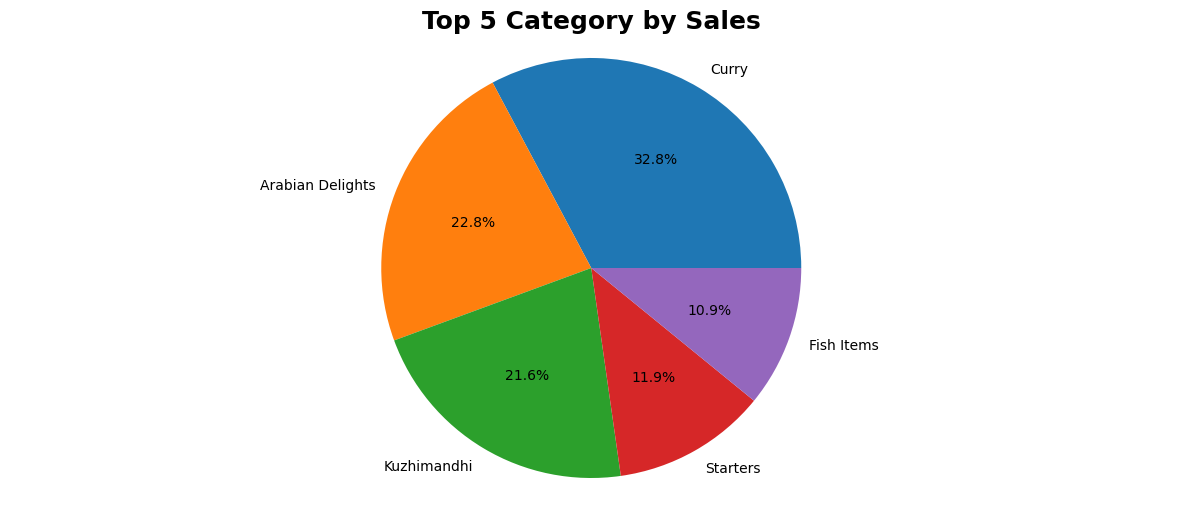

In [41]:
plt.figure(figsize=(15,6))
plt.pie(top5_categories.sales,labels=top5_categories.category,autopct = '%1.1f%%')
plt.title("Top 5 Category by Sales",fontsize=18,fontweight='bold')
plt.axis("equal")
plt.show()

# Top 5 Items Sold

In [19]:
top5_items_sold=df.groupby("item")["sales"].sum().reset_index().sort_values(by="sales",ascending=False).reset_index(drop=True).head(5)
top5_items_sold

,item,sales
0,Fish Mandhi Full (1Kg),150700
1,Fish Grill Half (500Gm),107600
2,Fish Grill Full (1Kg),65550
3,Shawai Mandhi Full,58460
4,Jallikattu Shawai Mandhi Full,56950


In [20]:
top5_items_sold.dtypes

item     object
sales     int64
dtype: object

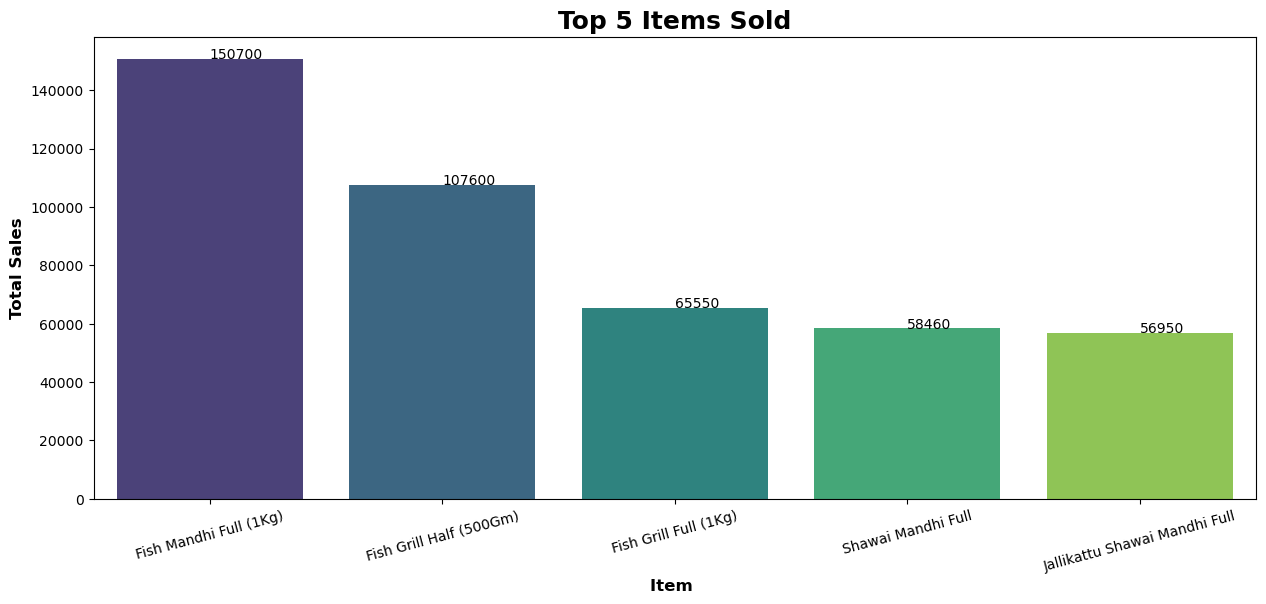

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x="item", y="sales", data =top5_items_sold, hue= "item",palette='viridis',legend=False)
plt.title("Top 5 Items Sold",fontsize=18,fontweight='bold')
plt.xticks(rotation=15)
plt.xlabel("Item ",fontsize=12,fontweight='bold')
plt.ylabel("Total Sales",fontsize=12,fontweight='bold')
for i, j in enumerate(top5_items_sold.sales):
    plt.text(x=i,y=j+0.5,s=str(j))
plt.show()


# Top 5 Most Frequently Ordered Items

In [22]:
top5_items_quantity=df.groupby("item")["quantity_sold"].sum().reset_index().sort_values(by="quantity_sold",ascending=False).reset_index(drop=True).head(5)
top5_items_quantity

,item,quantity_sold
0,Tea,531
1,Kerala Parotta,310
2,Shawai Parotta +Mayo+Salad Quarter 1 Parotta,286
3,Peri-Peri Alfaham Quarter 1 Parotta,230
4,Fish Grill Half (500Gm),188


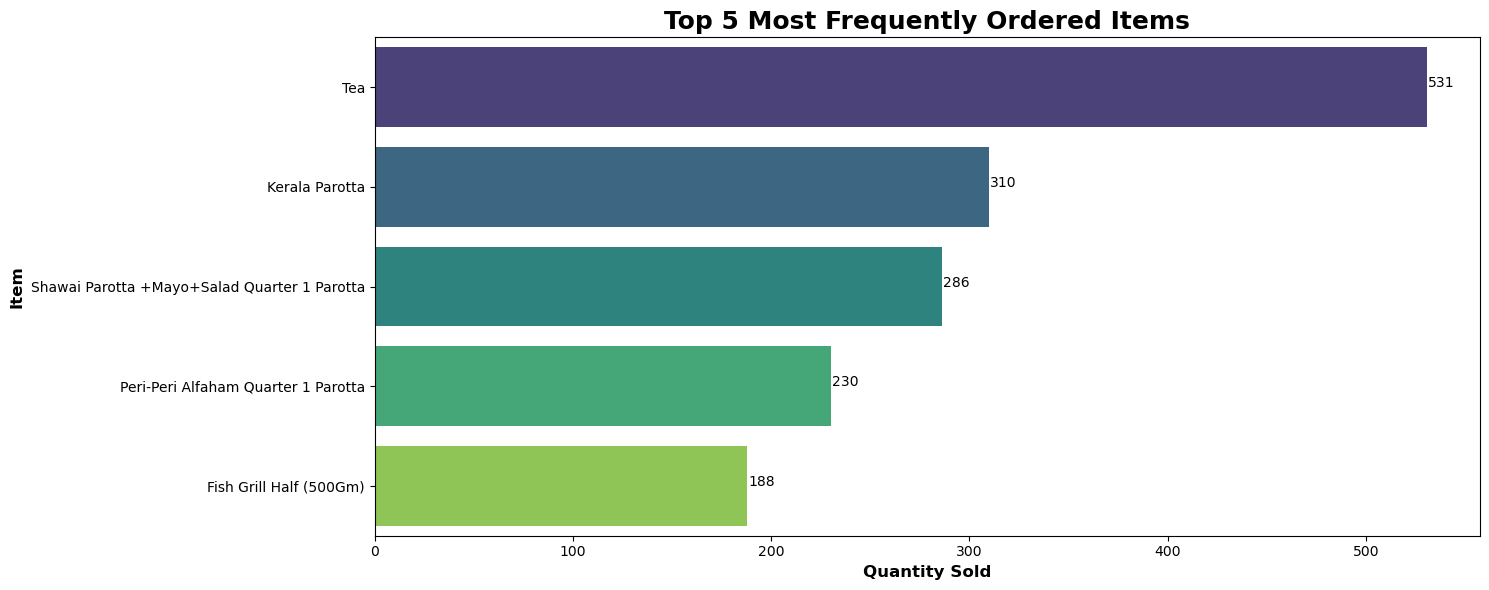

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(y="item", x="quantity_sold", data=top5_items_quantity,hue="item", palette="viridis")
plt.title("Top 5 Most Frequently Ordered Items",fontsize=18,fontweight='bold')
plt.xlabel("Quantity Sold",fontsize=12,fontweight='bold')
plt.ylabel("Item",fontsize=12,fontweight='bold')
plt.tight_layout()
for i, j in enumerate(top5_items_quantity.quantity_sold):
    plt.text(j+.5,i,str(j))
plt.show()

# Hourly Order Trend  

In [24]:
df.time.unique()

array(['00:00:00', '01:00:00', '11:00:00', '12:00:00', '13:00:00',
       '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00',
       '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00'],
      dtype=object)

# Enabling a custom sort for the  time column (Opening Hour= 11:00:00)

In [25]:
custom_sort=["11:00:00", "12:00:00", "13:00:00", "14:00:00", "15:00:00","16:00:00", "17:00:00", "18:00:00", "19:00:00", "20:00:00","21:00:00", "22:00:00", "23:00:00", "00:00:00", "01:00:00"]
df.time=pd.Categorical(df.time, categories=custom_sort, ordered=True)
df=df.sort_values(by="time")
df.head(5)

,order_id,order_date,time,item,category,unit price,quantity_sold,sales
941,7664,25-05-2025,11:00:00,Sanghai Chicken,Starters,260.0,3,780
749,1261,04-05-2025,11:00:00,Fish Grill Half (500Gm),Fish Items,600.0,2,1200
750,4666,15-05-2025,11:00:00,Jallikattu Alfaham Mandhi Full,Kuzhimandhi,850.0,2,1700
751,5159,17-05-2025,11:00:00,Chicken Fry Full,Curry,220.0,1,220
752,3282,11-05-2025,11:00:00,Butterscotch Shake,Shakes,100.0,3,300


# Grouping manually sorted time column 

In [26]:
time_group=df.groupby("time",observed=True)["item"].count().reset_index().sort_values(by="time")
time_group


,time,item
0,11:00:00,651
1,12:00:00,1042
2,13:00:00,873
3,14:00:00,709
4,15:00:00,557
5,16:00:00,507
6,17:00:00,657
7,18:00:00,886
8,19:00:00,1265
9,20:00:00,1248


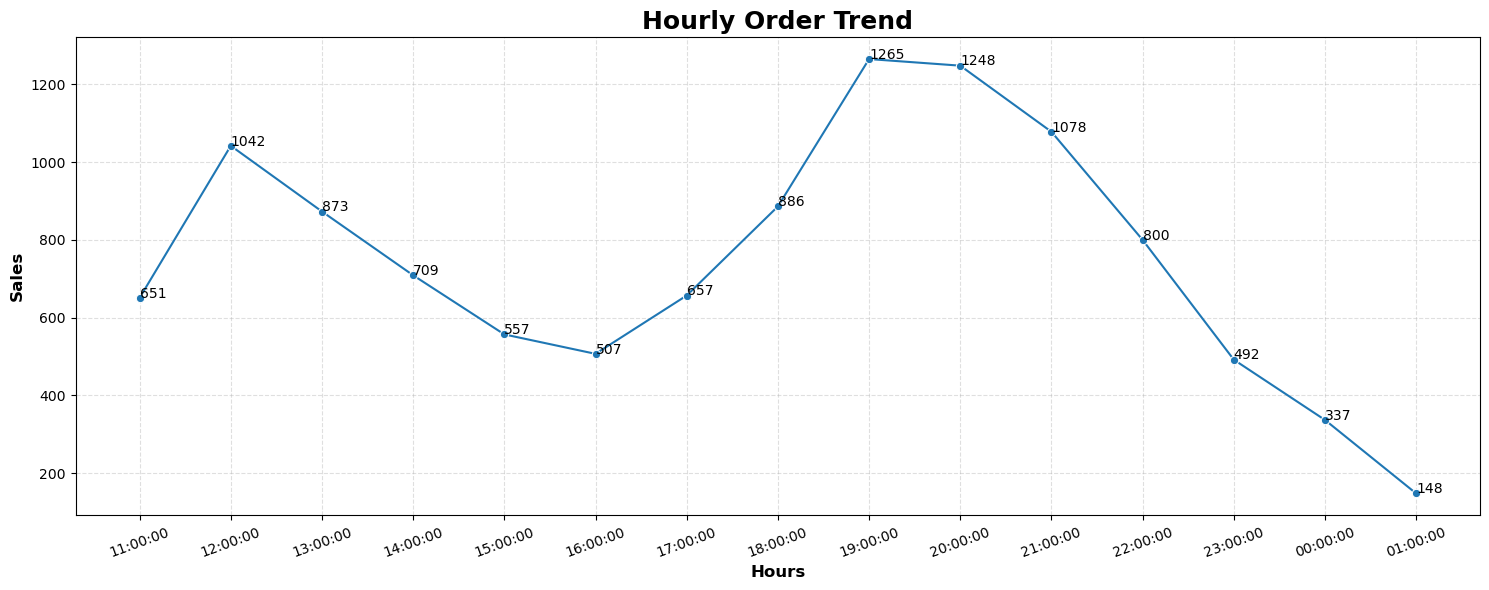

In [36]:
plt.figure(figsize=(15,6))
sns.lineplot(x=time_group.time, y=time_group.item,marker="o")
plt.title("Hourly Order Trend",fontsize=18,fontweight='bold')
plt.xticks(rotation=20)
plt.xlabel("Hours",fontsize=12,fontweight='bold')
plt.ylabel("Sales",fontsize=12,fontweight='bold')
plt.tight_layout()
for i, j in enumerate(time_group.item):
    plt.text(i,j+.5,str(j))
plt.grid(True,linestyle ="--", alpha =0.4)
plt.show()

# Daily Order Trend

In [28]:
df.head(4)

,order_id,order_date,time,item,category,unit price,quantity_sold,sales
941,7664,25-05-2025,11:00:00,Sanghai Chicken,Starters,260.0,3,780
749,1261,04-05-2025,11:00:00,Fish Grill Half (500Gm),Fish Items,600.0,2,1200
750,4666,15-05-2025,11:00:00,Jallikattu Alfaham Mandhi Full,Kuzhimandhi,850.0,2,1700
751,5159,17-05-2025,11:00:00,Chicken Fry Full,Curry,220.0,1,220


In [29]:
ordersondays=df.groupby("order_date")["sales"].sum().reset_index().sort_values(by="order_date", ascending=True).reset_index(drop=True)
ordersondays

,order_date,sales
0,01-05-2025,106969
1,02-05-2025,137197
2,03-05-2025,137833
3,04-05-2025,162005
4,05-05-2025,184620
5,06-05-2025,108258
6,07-05-2025,115268
7,08-05-2025,129788
8,09-05-2025,129485
9,10-05-2025,184549


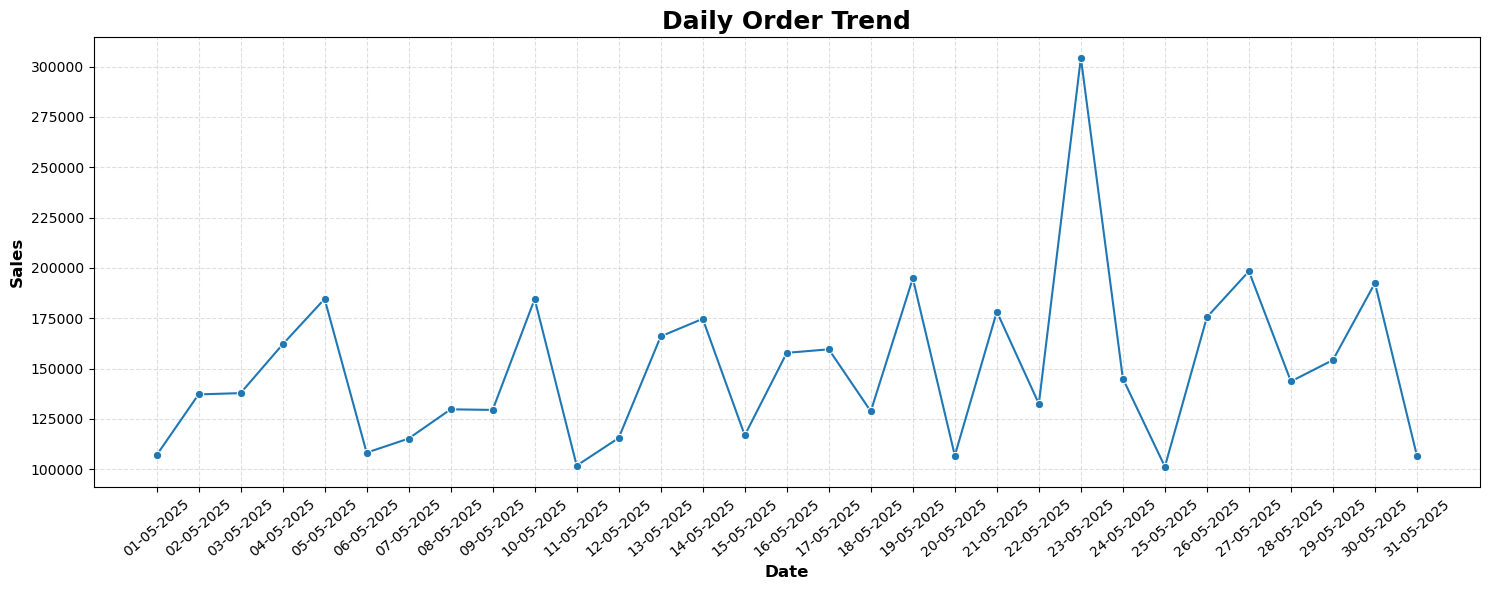

In [43]:
def format_number(n):
    if j >= 1_000_000:
        return f'{n/1_000_000:.1f}M'
    elif j >= 1_000:
        return f'{j/1_000:.0f}K'
    else:
        return str(j)
plt.figure(figsize=(15,6))
sns.lineplot(x=ordersondays.order_date,y=ordersondays.sales,marker="o")
plt.title("Daily Order Trend",fontsize=18,fontweight='bold')
plt.xticks(rotation=40)
plt.xlabel("Date",fontsize=12,fontweight='bold')
plt.ylabel("Sales",fontsize=12,fontweight='bold')
plt.tight_layout()
plt.grid(True,linestyle ="--", alpha =0.4)
plt.show()

In [ ]:
# ----END----